In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-dataset/customer_churn_data.csv


In [8]:
df = pd.read_csv("/kaggle/input/customer-churn-dataset/customer_churn_data.csv")

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [10]:
# import pandas as pd

# x = [1,2,3,4,5]
# y = [2,4,6,8,10]

# df = pd.DataFrame({
#     'study_hour': x,
#     'marks': y
# })

# print(df)


In [11]:
# df.corr()

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

In [13]:
# plt.figure(figsize = (4,4))
# sns.heatmap(df.corr(), annot = True)

In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
# creat Objects
le = LabelEncoder()
tree_model = DecisionTreeClassifier()

In [18]:
# Encode
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,22,0,1,2,1,...,1,1,1,1,0,1,0,1302,1602,0
1,1,0,0,1,0,42,0,1,0,2,...,2,0,2,0,0,0,3,3579,4691,1
2,2,1,1,0,0,50,1,0,0,0,...,2,2,0,0,1,0,2,3423,5007,1
3,3,1,1,0,0,71,1,2,0,2,...,2,0,0,0,0,0,1,3614,5698,0
4,4,1,1,0,0,24,1,2,0,0,...,0,2,0,2,0,0,2,1425,1832,1


In [20]:
df["Churn"].value_counts()

Churn
0    2982
1    2898
Name: count, dtype: int64

<Axes: title={'center': 'Churn columns check'}, xlabel='Churn'>

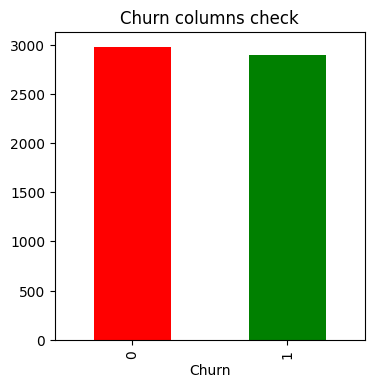

In [21]:
plt.figure(figsize = (4,4))
plt.title("Churn columns check")
df['Churn'].value_counts().plot(kind = "bar", color = ["red", "green"])

In [22]:
# check correlation
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.001873,0.009018,0.013696,0.015901,0.008887,0.022846,0.019578,0.021453,-0.007842,...,0.004324,-0.018853,-0.001985,-0.001644,-0.000158,0.007898,0.010083,-0.006775,0.006517,0.010465
gender,0.001873,1.000000,0.014281,0.009802,0.000754,0.029348,-0.004423,0.006426,-0.020987,-0.005223,...,0.004833,-0.013230,0.021622,0.007768,-0.001585,0.015706,0.004113,0.009383,0.025047,0.008213
SeniorCitizen,0.009018,0.014281,1.000000,-0.013293,-0.009496,0.006154,0.015306,0.009353,0.014681,-0.005662,...,0.008616,-0.001888,-0.004843,-0.021228,-0.004548,0.000704,-0.015175,0.014138,0.009977,-0.004743
Partner,0.013696,0.009802,-0.013293,1.000000,-0.009461,0.000005,-0.006810,-0.007831,0.001504,-0.013914,...,0.007773,-0.003522,-0.003283,0.014880,-0.004553,0.019032,-0.015756,-0.007182,-0.001883,0.010134
Dependents,0.015901,0.000754,-0.009496,-0.009461,1.000000,-0.011201,-0.011900,0.007893,-0.013462,-0.003350,...,0.022916,-0.012882,-0.026545,-0.001841,-0.020091,0.012560,0.001836,0.009824,0.001333,0.001050
tenure,0.008887,0.029348,0.006154,0.000005,-0.011201,1.000000,-0.014707,-0.001042,-0.000625,0.000780,...,-0.006579,-0.008090,-0.014777,-0.006634,0.000574,0.013553,-0.004376,0.004321,0.811040,0.008600
PhoneService,0.022846,-0.004423,0.015306,-0.006810,-0.011900,-0.014707,1.000000,0.019956,0.002686,0.019968,...,-0.005254,-0.025007,-0.020387,0.012818,0.013749,0.013953,0.008270,-0.001166,-0.010297,-0.018024
MultipleLines,0.019578,0.006426,0.009353,-0.007831,0.007893,-0.001042,0.019956,1.000000,-0.013567,0.003153,...,-0.009515,-0.008862,0.005806,0.016597,-0.018959,-0.012891,-0.007395,0.029249,0.012114,-0.000918
InternetService,0.021453,-0.020987,0.014681,0.001504,-0.013462,-0.000625,0.002686,-0.013567,1.000000,-0.000850,...,0.008699,-0.005067,-0.021123,0.007634,0.022265,-0.009824,-0.013287,-0.000693,-0.003937,0.005454
OnlineSecurity,-0.007842,-0.005223,-0.005662,-0.013914,-0.003350,0.000780,0.019968,0.003153,-0.000850,1.000000,...,-0.015839,-0.027811,-0.014740,0.002358,0.006217,-0.017599,-0.024262,-0.014437,-0.011304,-0.004543


In [23]:
test = df[['gender', 'Churn']]

In [24]:
test.corr()

,gender,Churn
gender,1.000000,0.008213
Churn,0.008213,1.000000


In [25]:
x = df.drop(["Churn"], axis = 1)
y = df[["Churn"]]

In [26]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,1,22,0,1,2,1,1,1,1,1,1,0,1,0,1302,1602
1,1,0,0,1,0,42,0,1,0,2,0,2,0,2,0,0,0,3,3579,4691
2,2,1,1,0,0,50,1,0,0,0,2,2,2,0,0,1,0,2,3423,5007
3,3,1,1,0,0,71,1,2,0,2,0,2,0,0,0,0,0,1,3614,5698
4,4,1,1,0,0,24,1,2,0,0,0,0,2,0,2,0,0,2,1425,1832


In [27]:
y.head()

,Churn
0,0
1,1
2,1
3,0
4,1


**Only Decision Tree classifier**

In [28]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4704, 20), (4704, 1), (1176, 20), (1176, 1))

In [70]:
model1 = tree_model.fit(x_train, y_train)

In [74]:
train_score = model1.score(x_train, y_train)
test_score = model1.score(x_test, y_test)

**The model is complete overfit because Tranning score is very good (1) but test score is very low (0.50).**

In [75]:
print("Train Score : ",train_score)
print("Test score : ", test_score)

Train Score :  1.0
Test score :  0.4991496598639456


In [33]:
# accuracy_score(y_test, pred1)

In [34]:
pred1 = model1.predict(x_test)

In [35]:
cm = confusion_matrix(y_test, pred1)
cm
#very bad

array([[298, 286],
       [287, 305]])

<Axes: >

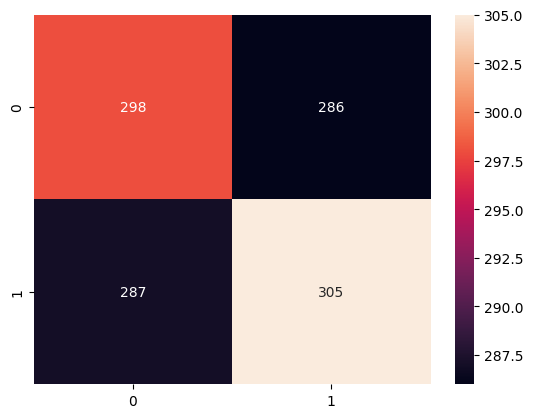

In [36]:
sns.heatmap(cm, annot = True, fmt = 'g')

[Text(0.4692080797797192, 0.9857142857142858, 'x[19] <= 2163.5\ngini = 0.5\nsamples = 4704\nvalue = [2398, 2306]'),
 Text(0.1649880637678032, 0.9571428571428572, 'x[19] <= 1285.5\ngini = 0.498\nsamples = 1760\nvalue = [939.0, 821.0]'),
 Text(0.3170980717737612, 0.9714285714285715, 'True  '),
 Text(0.08384107277729823, 0.9285714285714286, 'x[19] <= 1224.0\ngini = 0.5\nsamples = 1026\nvalue = [512, 514]'),
 Text(0.0593389215580492, 0.9, 'x[0] <= 5859.5\ngini = 0.5\nsamples = 978\nvalue = [497, 481]'),
 Text(0.058475736404833834, 0.8714285714285714, 'x[0] <= 2464.0\ngini = 0.5\nsamples = 972\nvalue = [497, 475]'),
 Text(0.03849266292619767, 0.8428571428571429, 'x[0] <= 2362.0\ngini = 0.495\nsamples = 418\nvalue = [230, 188]'),
 Text(0.03525571860164005, 0.8142857142857143, 'x[0] <= 2292.0\ngini = 0.497\nsamples = 404\nvalue = [218, 186]'),
 Text(0.03309775571860164, 0.7857142857142857, 'x[0] <= 2193.0\ngini = 0.496\nsamples = 397\nvalue = [217, 180]'),
 Text(0.03137138541217091, 0.7571428

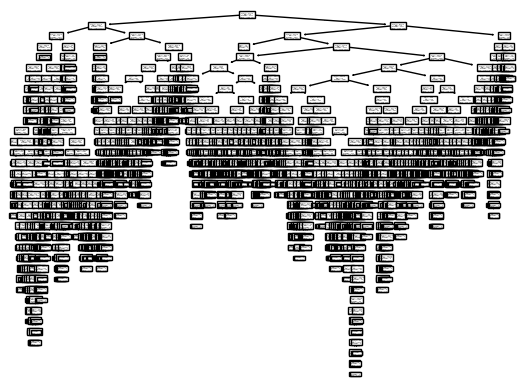

In [37]:
plot_tree(tree_model)

***Using GridSearchCV***

**Parameter Optimization**

In [53]:
#parameter Optimization
parameter = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "ccp_alpha" : [1.0, .01, .001, .1],
    "max_depth" : [5,6,7,8,9,10],
    "splitter" : ["best", "random"],
    "max_features" : ['sqrt', 'log2']
}

In [39]:
gscv = GridSearchCV(tree_model, param_grid = parameter, verbose = 2, cv = 5)

In [40]:
gscv

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1.0, 0.01, 0.001, 0.1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [41]:
# fit with GridSearchCV
tree_model2 = gscv.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=5, max_features=sqrt, splitter=r

In [42]:
train_score2 = tree_model2.score(x_train, y_train)
test_score2 = tree_model2.score(x_test, y_test)

**This model is better then tha previous model**

In [43]:
print("train_score2 : ", train_score2)
print("test_score2 :", test_score2)

train_score2 :  0.5097789115646258
test_score2 : 0.4965986394557823


In [82]:
pred2 = tree_model2.predict(x_test)

In [83]:
cm = confusion_matrix(y_test, pred2)


In [84]:
cm

array([[584,   0],
       [592,   0]])

**This model is less false prediction than the previous model**

<Axes: >

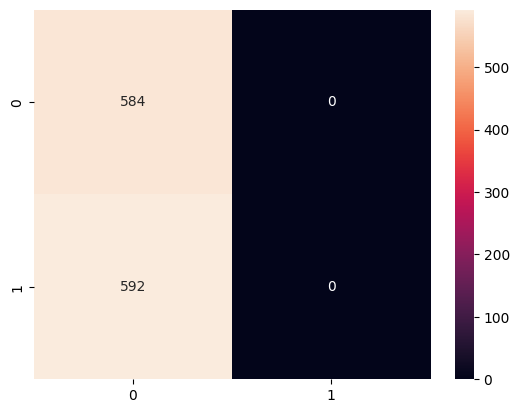

In [78]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [47]:
# check the best feature
print("Best Estimator : ",tree_model2.best_estimator_)
print("Best parameter : ", tree_model2.best_params_)
print("Best Score : ", tree_model2.best_score_)
print("Best Index : ",tree_model2.best_index_)

Best Estimator :  DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='sqrt')
Best parameter :  {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'splitter': 'best'}
Best Score :  0.5138171252854591
Best Index :  160


[Text(0.5, 0.5, 'gini = 0.5\nsamples = 4704\nvalue = [2398, 2306]')]

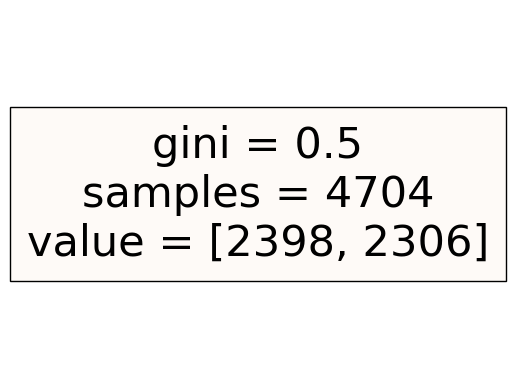

In [48]:
plot_tree(tree_model2.best_estimator_, filled = True)

# Using Random Search CV

In [61]:
random_search = RandomizedSearchCV(estimator = tree_model, param_distributions = parameter,n_iter = 20, cv = 5, random_state = 42, verbose=2,n_jobs=-1)

In [62]:
tree_model3 = random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [63]:
tree_model3

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [1.0, 0.01, 0.001, 0.1],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [64]:
print(tree_model3.best_estimator_)
print(tree_model3.best_score_)
print(tree_model3.best_index_)

DecisionTreeClassifier(ccp_alpha=1.0, criterion='entropy', max_depth=10,
                       max_features='sqrt', splitter='random')
0.5097788681122392
0


In [67]:
print("Tree model3 train score : ",tree_model3.score(x_train, y_train))
print("Tree model3 test score : ",tree_model3.score(x_test, y_test))

Tree model3 train score :  0.5097789115646258
Tree model3 test score :  0.4965986394557823
[CV] END ccp_alpha=1.0, criterion=entropy, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=entropy, max_depth=9, max_features=log2, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=entropy, max_depth=9, max_features=log2, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=1.0, criterion=gini, max_depth=7, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ccp_alpha=1.0, crite

In [86]:
pred2 = tree_model3.predict(x_test)

In [87]:
cm = confusion_matrix(y_test, pred2)

In [88]:
cm

array([[584,   0],
       [592,   0]])

<Axes: >

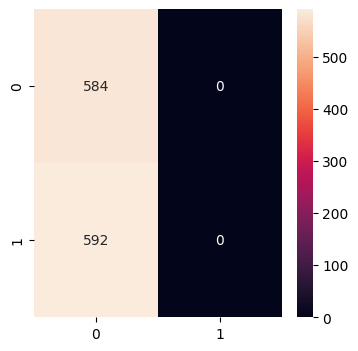

In [90]:
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, fmt = 'g')

**ROC Curve**

In [106]:
# best_grid_model = tree_model2.best_estimator_
# best_random_model = tree_model3.best_estimator_

In [109]:
# ROC curve need probability, not the class label
y_proba_grid = tree_model2.predict_proba(x_test)[:, 1]
y_proba_random = tree_model3.predict_proba(x_test)[:,1]

In [111]:
fpr_grid, tpr_grid, _ = roc_curve(y_test, y_proba_grid)
fpr_random, tpr_random, _ = roc_curve(y_test, y_proba_random)

auc_grid = auc(fpr_grid, tpr_grid)
auc_random = auc(fpr_random, tpr_random)


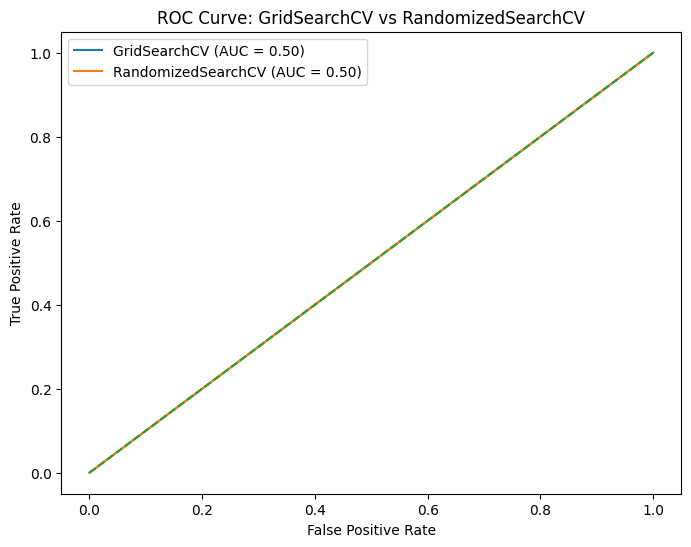

In [112]:
plt.figure(figsize=(8,6))

plt.plot(fpr_grid, tpr_grid,
         label=f'GridSearchCV (AUC = {auc_grid:.2f})')

plt.plot(fpr_random, tpr_random,
         label=f'RandomizedSearchCV (AUC = {auc_random:.2f})')

# Random guess line
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: GridSearchCV vs RandomizedSearchCV')
plt.legend()
plt.show()
